# Principal Component Analysis Assignment

In [21]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [22]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')

In [23]:
data

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,batterName,batterHand,batterPosition,pitcherId,pitcherName,pitcherHand,timesFaced,catcherId,catcher,umpireId,umpire,probCalledStrike,pitchResult,pitchType,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,452655,Denard Span,L,CF,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,0.975,SL,FF,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,452655,Denard Span,L,CF,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,0.745,SL,FT,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN
2,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,2,0,452655,Denard Span,L,CF,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,0.968,IP,FF,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,FB,27.78,323.03,IP_OUT
3,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,1,605412,Joe Panik,L,2B,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,1.000,SL,FT,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,NaN,NaN
4,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,1,605412,Joe Panik,L,2B,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,1.000,F,FF,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79926,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,1,1,2,475174,Yonder Alonso,L,1B,457732,Andrew Bailey,R,1,542908,Jett Bandy,427315,Alfonso Marquez,0.989,F,FF,92.5,1802.52,170.921,0.124,2.782,1.44,8.95,NaN,NaN,NaN,NaN
79927,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,1,2,2,475174,Yonder Alonso,L,1B,457732,Andrew Bailey,R,1,542908,Jett Bandy,427315,Alfonso Marquez,0.000,B,FF,93.5,1591.22,173.371,-1.577,3.571,0.92,7.85,NaN,NaN,NaN,NaN
79928,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,2,2,2,475174,Yonder Alonso,L,1B,457732,Andrew Bailey,R,1,542908,Jett Bandy,427315,Alfonso Marquez,0.939,F,FC,88.3,743.92,151.086,0.357,2.942,1.91,3.42,NaN,NaN,NaN,NaN
79929,gid_2016_09_26_oakmlb_anamlb_1,2016-09-26,OAK,LAA,9,T,2,2,2,475174,Yonder Alonso,L,1B,457732,Andrew Bailey,R,1,542908,Jett Bandy,427315,Alfonso Marquez,0.826,F,FF,93.6,2239.31,173.146,0.565,2.027,1.35,11.15,NaN,NaN,NaN,NaN


### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [24]:
data = data.dropna()
df = data.select_dtypes(exclude=['object'])
df

,inning,balls,strikes,outs,batterId,pitcherId,timesFaced,catcherId,umpireId,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
2,1,0,2,0,452655,503449,1,518960,427192,0.968,96.5,2127.170,198.816,0.389,2.266,-5.22,9.79,27.78,323.03
5,1,0,2,1,605412,503449,1,518960,427192,0.321,98.3,2038.060,206.732,-0.206,1.430,-8.30,7.96,-15.32,121.39
8,1,1,1,2,457763,503449,1,518960,427192,0.944,96.3,1909.360,203.540,-0.280,1.990,-6.03,7.98,-34.27,97.07
11,1,1,1,0,570267,518516,1,457763,427192,0.753,92.5,2424.900,140.242,-0.523,1.858,9.10,10.75,-32.44,257.08
23,1,2,2,0,460075,518516,1,457763,427192,0.974,92.1,2319.270,138.209,-0.666,2.667,6.46,9.35,2.02,305.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79902,8,1,0,1,405395,623430,1,519390,427315,0.720,84.1,692.172,109.742,0.482,1.579,3.63,1.25,38.89,51.92
79907,8,1,2,2,527043,623430,1,519390,427315,0.000,84.0,551.530,131.627,1.374,1.263,2.27,1.97,16.58,104.32
79911,9,0,2,0,519390,457732,1,542908,427315,0.297,87.9,896.178,129.103,0.622,3.149,3.66,2.93,-105.31,61.77
79915,9,1,2,1,592387,457732,1,542908,427315,0.043,86.3,544.542,108.367,1.178,2.103,2.77,0.88,32.34,34.43


In [25]:
Y = data['pitchType']
X = df
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

### Compute the explained variance for new data set.

In [28]:
pca.explained_variance_

array([2.38318443, 1.62470543])

### Generate a scatter plot that visualizes how the component values are distributed.

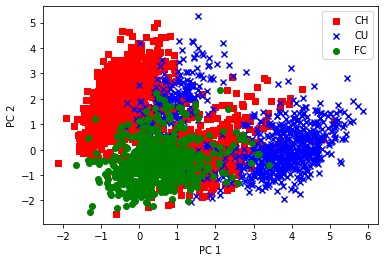

In [32]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper right')
plt.show()

### Create a line plot that shows the explained variance by number of components.

No handles with labels found to put in legend.


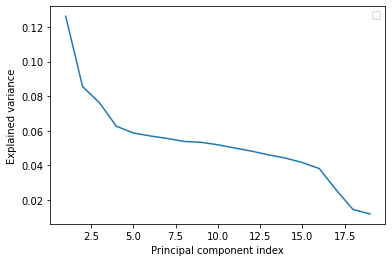

In [63]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

# plot explained variances
plt.plot(range(1,20), var_exp)
plt.ylabel('Explained variance')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [27]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [46]:
npc = []
scores = []
for i in range(2,20):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train_scale)
  X_test_pca = pca.transform(X_test_scale)
  model.fit(X_train_pca, y_train)
  npc.append(i)
  scores.append(model.score(X_train_pca,y_train))

In [48]:
scores

[0.5514418604651162,
 0.5396279069767442,
 0.560093023255814,
 0.5603720930232559,
 0.5645581395348838,
 0.5445581395348837,
 0.5366511627906977,
 0.5737674418604651,
 0.5743255813953488,
 0.5648372093023256,
 0.5423255813953488,
 0.5412093023255814,
 0.5235348837209303,
 0.5408372093023256,
 0.5553488372093023,
 0.5637209302325581,
 0.5618604651162791,
 0.5666046511627907]

### Create a line plot that shows the training scores across the different numbers of principal components.

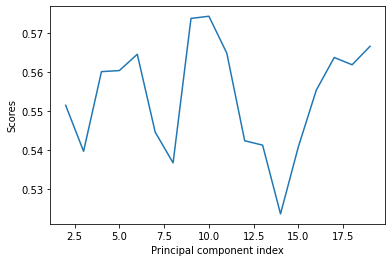

In [58]:
plt.plot(npc, scores)
plt.ylabel('Scores')
plt.xlabel('Principal component index')
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

when number of component is 10 the test returns the highest accuracy score of 0.5743. This shows that 10 is the optimal number for principal components. 